# Задача 3. Сравнение методов классификации

* **Дедлайн**: 19.11.2023, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [ ] Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
- [ ] Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- **target**). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).
- [ ] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- [ ] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
- [ ] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [ ] Используя **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
- [ ] Повторить предыдущий пункт для библиотечных реализаций (например, из **sklearn**) всех пройденных методов классификации (**logistic regression, svm, knn, naive bayes, decision tree**).
- [ ] Сравнить все обученные модели, построить их **confusion matrices**. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
- [ ] * (**+2 балла**) Реализовать еще один из методов классификации и добавить его в сравнение.
- [ ] * (**+3 балла**) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [238]:
# Импорты

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Dataset

Используемый набор данных: [Heart Disease Dataset](https://github.com/rustam-azimov/ml-course/blob/main/data/heart_disease/heart.csv)

Признаки:

| Наименование  | Описание |
| ------------- | ---------|
| age | Возраст в годах |
| sex | Пол (1 = male; 0 = female) |
| cp | Тип боли в груди |
| trestbps | Артериальное давление в состоянии покоя (в мм рт.ст. при поступлении в больницу) |
| chol | Уровень холестерина в сыворотке крови в мг/дл |
| fbs | Уровень сахара в крови натощак > 120 мг/дл (1 = true; 0 = false) |
| restecg | Результаты электрокардиографии в состоянии покоя |
| thalach | Максимальная частота сердцебиения |
| exang | Физ. нагрузка вызвала стенокардию (1 = yes; 0 = no) |
| oldpeak | Депрессия ST, вызванная физическими упражнениями, оносительно отдыха |
| slope | Наклон ST сегмента при пиковой нагрузке |
| ca | Количество магистральных сосудов (0-3), окрашенных флюороскопией |
| thal | 1 = normal; 2 = fixed defect; 3 = reversable defect |
| target | Есть ли заболевание (1=yes, 0=no) |


Целевой признак: **target** - предсказываем наличие заболевания.

### Чтение данных

In [239]:
df = pd.read_csv('../data/heart_disease/heart.csv')
df.shape

(1025, 14)

In [240]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Основные характеристики

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Пропущенных значений в данных нет.

In [242]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

In [243]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

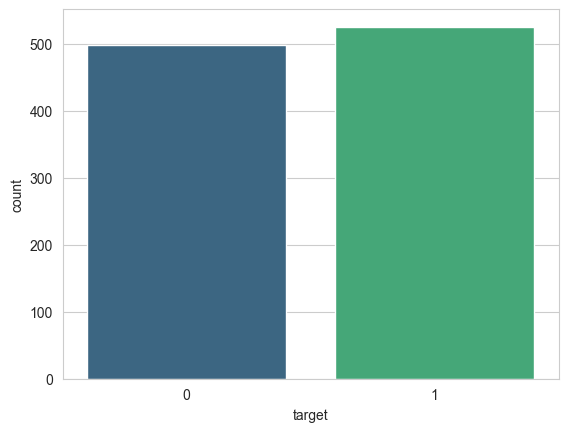

In [244]:
sns.countplot(x="target", data=df, palette='viridis')
plt.show()

Количество здоровых пациентов и пациентов с заболеванием сердца примерно одинаково, поэтому классы можно считать сбалансированными.

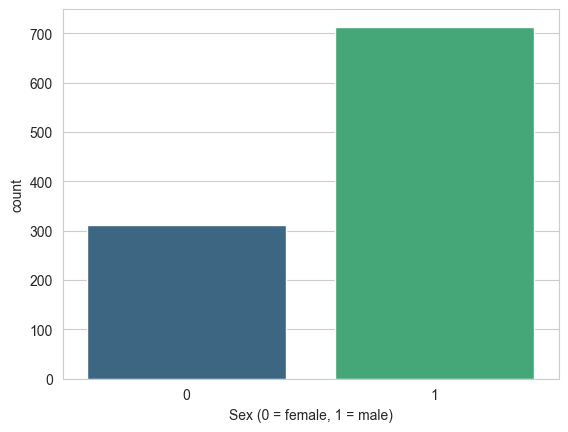

In [245]:
sns.countplot(x='sex', data=df, palette='viridis')
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

Среди пациентов чаще встречаются мужчины.

In [246]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Рассмотрим распределение пациентов по возрастам

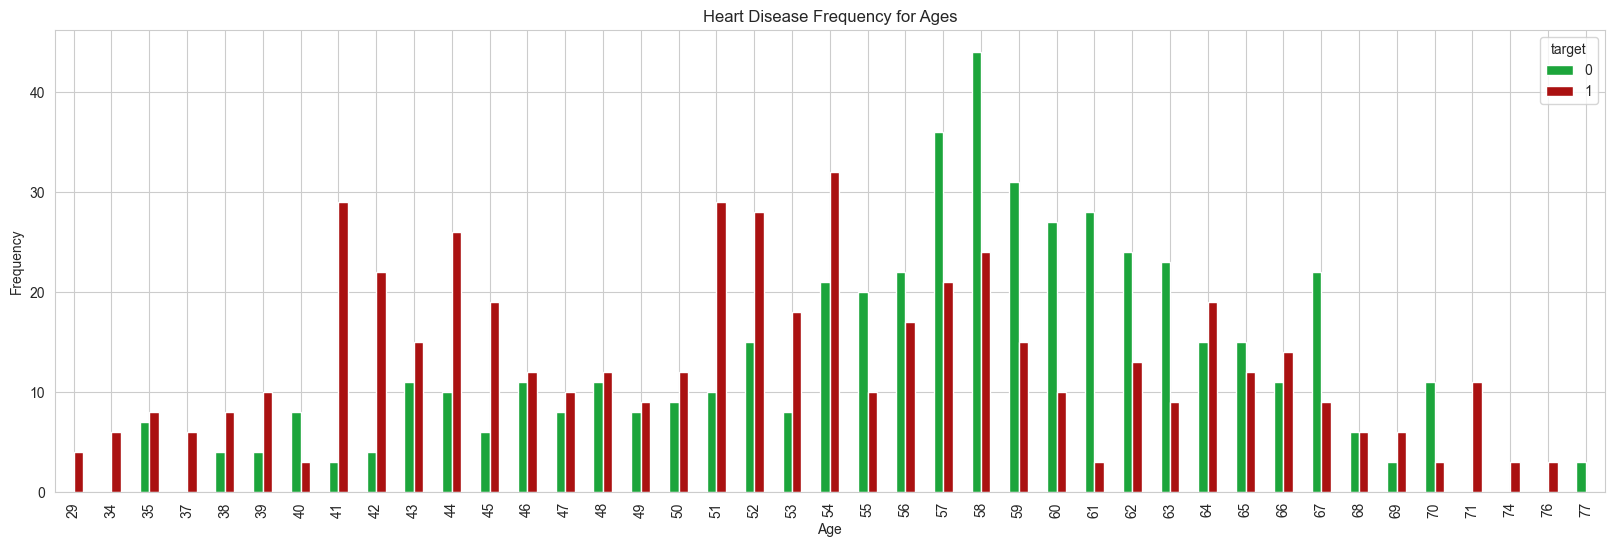

In [247]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

В основном с жалобами обращаются люди от 40 до 70 лет, при этом заболевание чаще выявляется у пациентов до 54 лет.

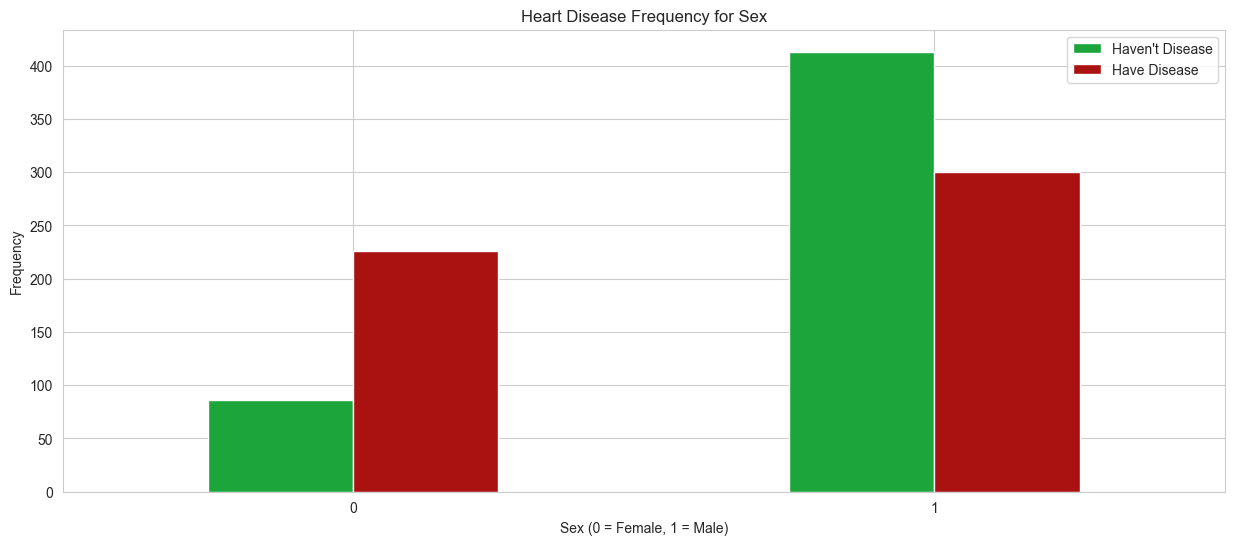

In [248]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

В датасете мужчин больше, чем женщин.

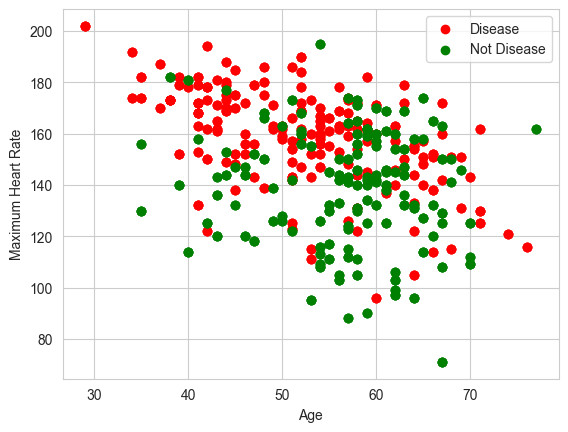

In [249]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Заболевание чаще выявляется у пациентов с повышенным сердцебиением (более 150 уд/мин).

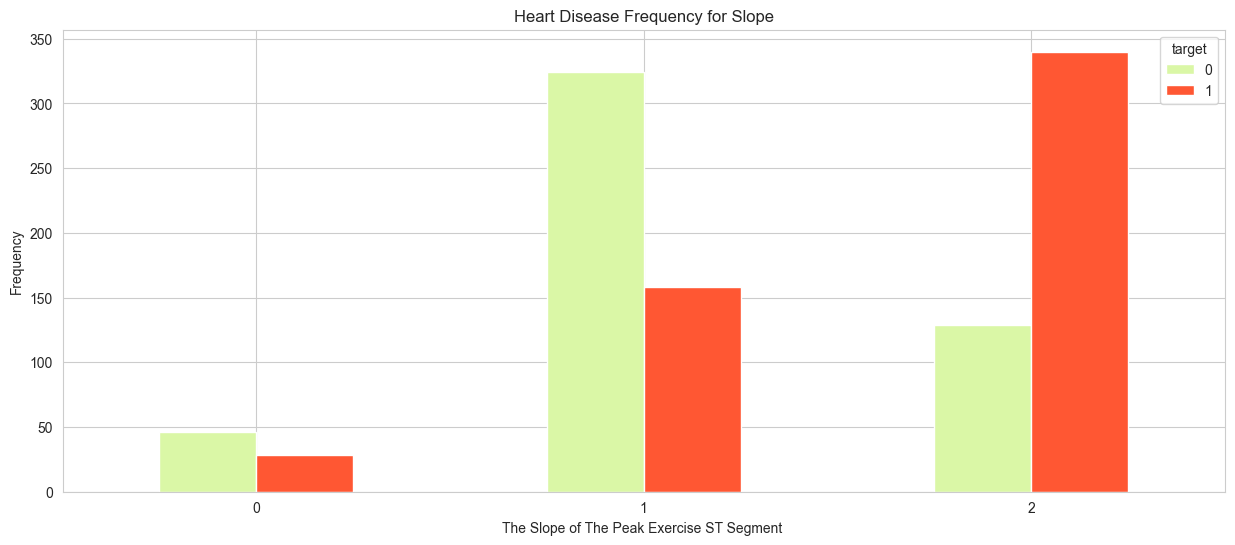

In [250]:
pd.crosstab(df.slope, df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

По всей видимости, величина наклона ST сегмента при пиковой нагрузке влияет на вероятность заболевания.

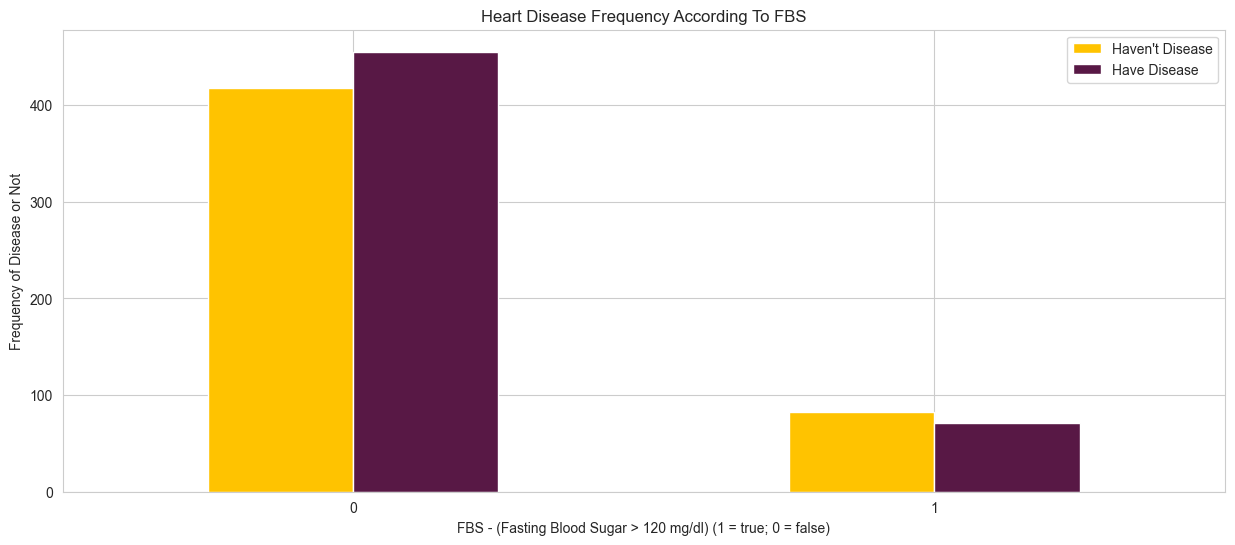

In [251]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Вероятно, заболевание сердца не сильно зависит от повышенного уровня сахара в крови.

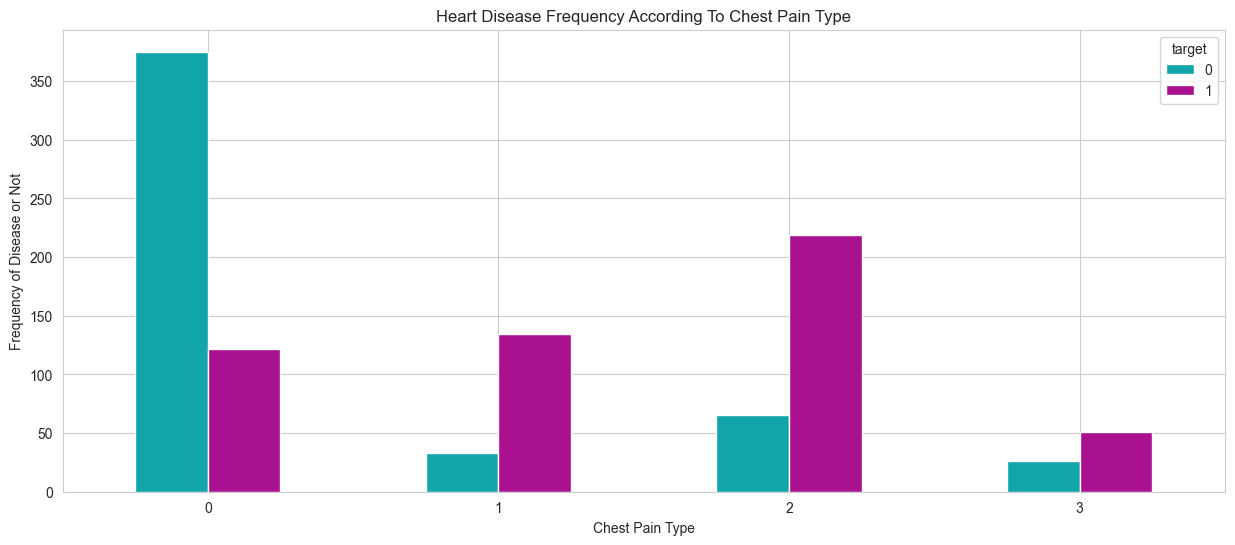

In [252]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

Как можно видеть, типы боли в груди 1 и 2 являются наиболее опасными, в то время как тип боли 0 является наиболее популярным, но чаще дает ложные опасения.

### Преобразование категориальных признаков

Закодируем категориальные признаки **cp**, **thal** и **slope**.

In [253]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,False,False,False,False,False,False,True,False,False,True
1,53,1,0,140,203,1,0,155,1,3.1,...,False,False,False,False,False,False,True,True,False,False
2,70,1,0,145,174,0,1,125,1,2.6,...,False,False,False,False,False,False,True,True,False,False
3,61,1,0,148,203,0,1,161,0,0.0,...,False,False,False,False,False,False,True,False,False,True
4,62,0,0,138,294,1,1,106,0,1.9,...,False,False,False,False,False,True,False,False,True,False


In [254]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,False,False,False,False,False,False,True,False,False,True
1,53,1,140,203,1,0,155,1,3.1,0,...,False,False,False,False,False,False,True,True,False,False
2,70,1,145,174,0,1,125,1,2.6,0,...,False,False,False,False,False,False,True,True,False,False
3,61,1,148,203,0,1,161,0,0.0,1,...,False,False,False,False,False,False,True,False,False,True
4,62,0,138,294,1,1,106,0,1.9,3,...,False,False,False,False,False,True,False,False,True,False


### Проверим корелляцию

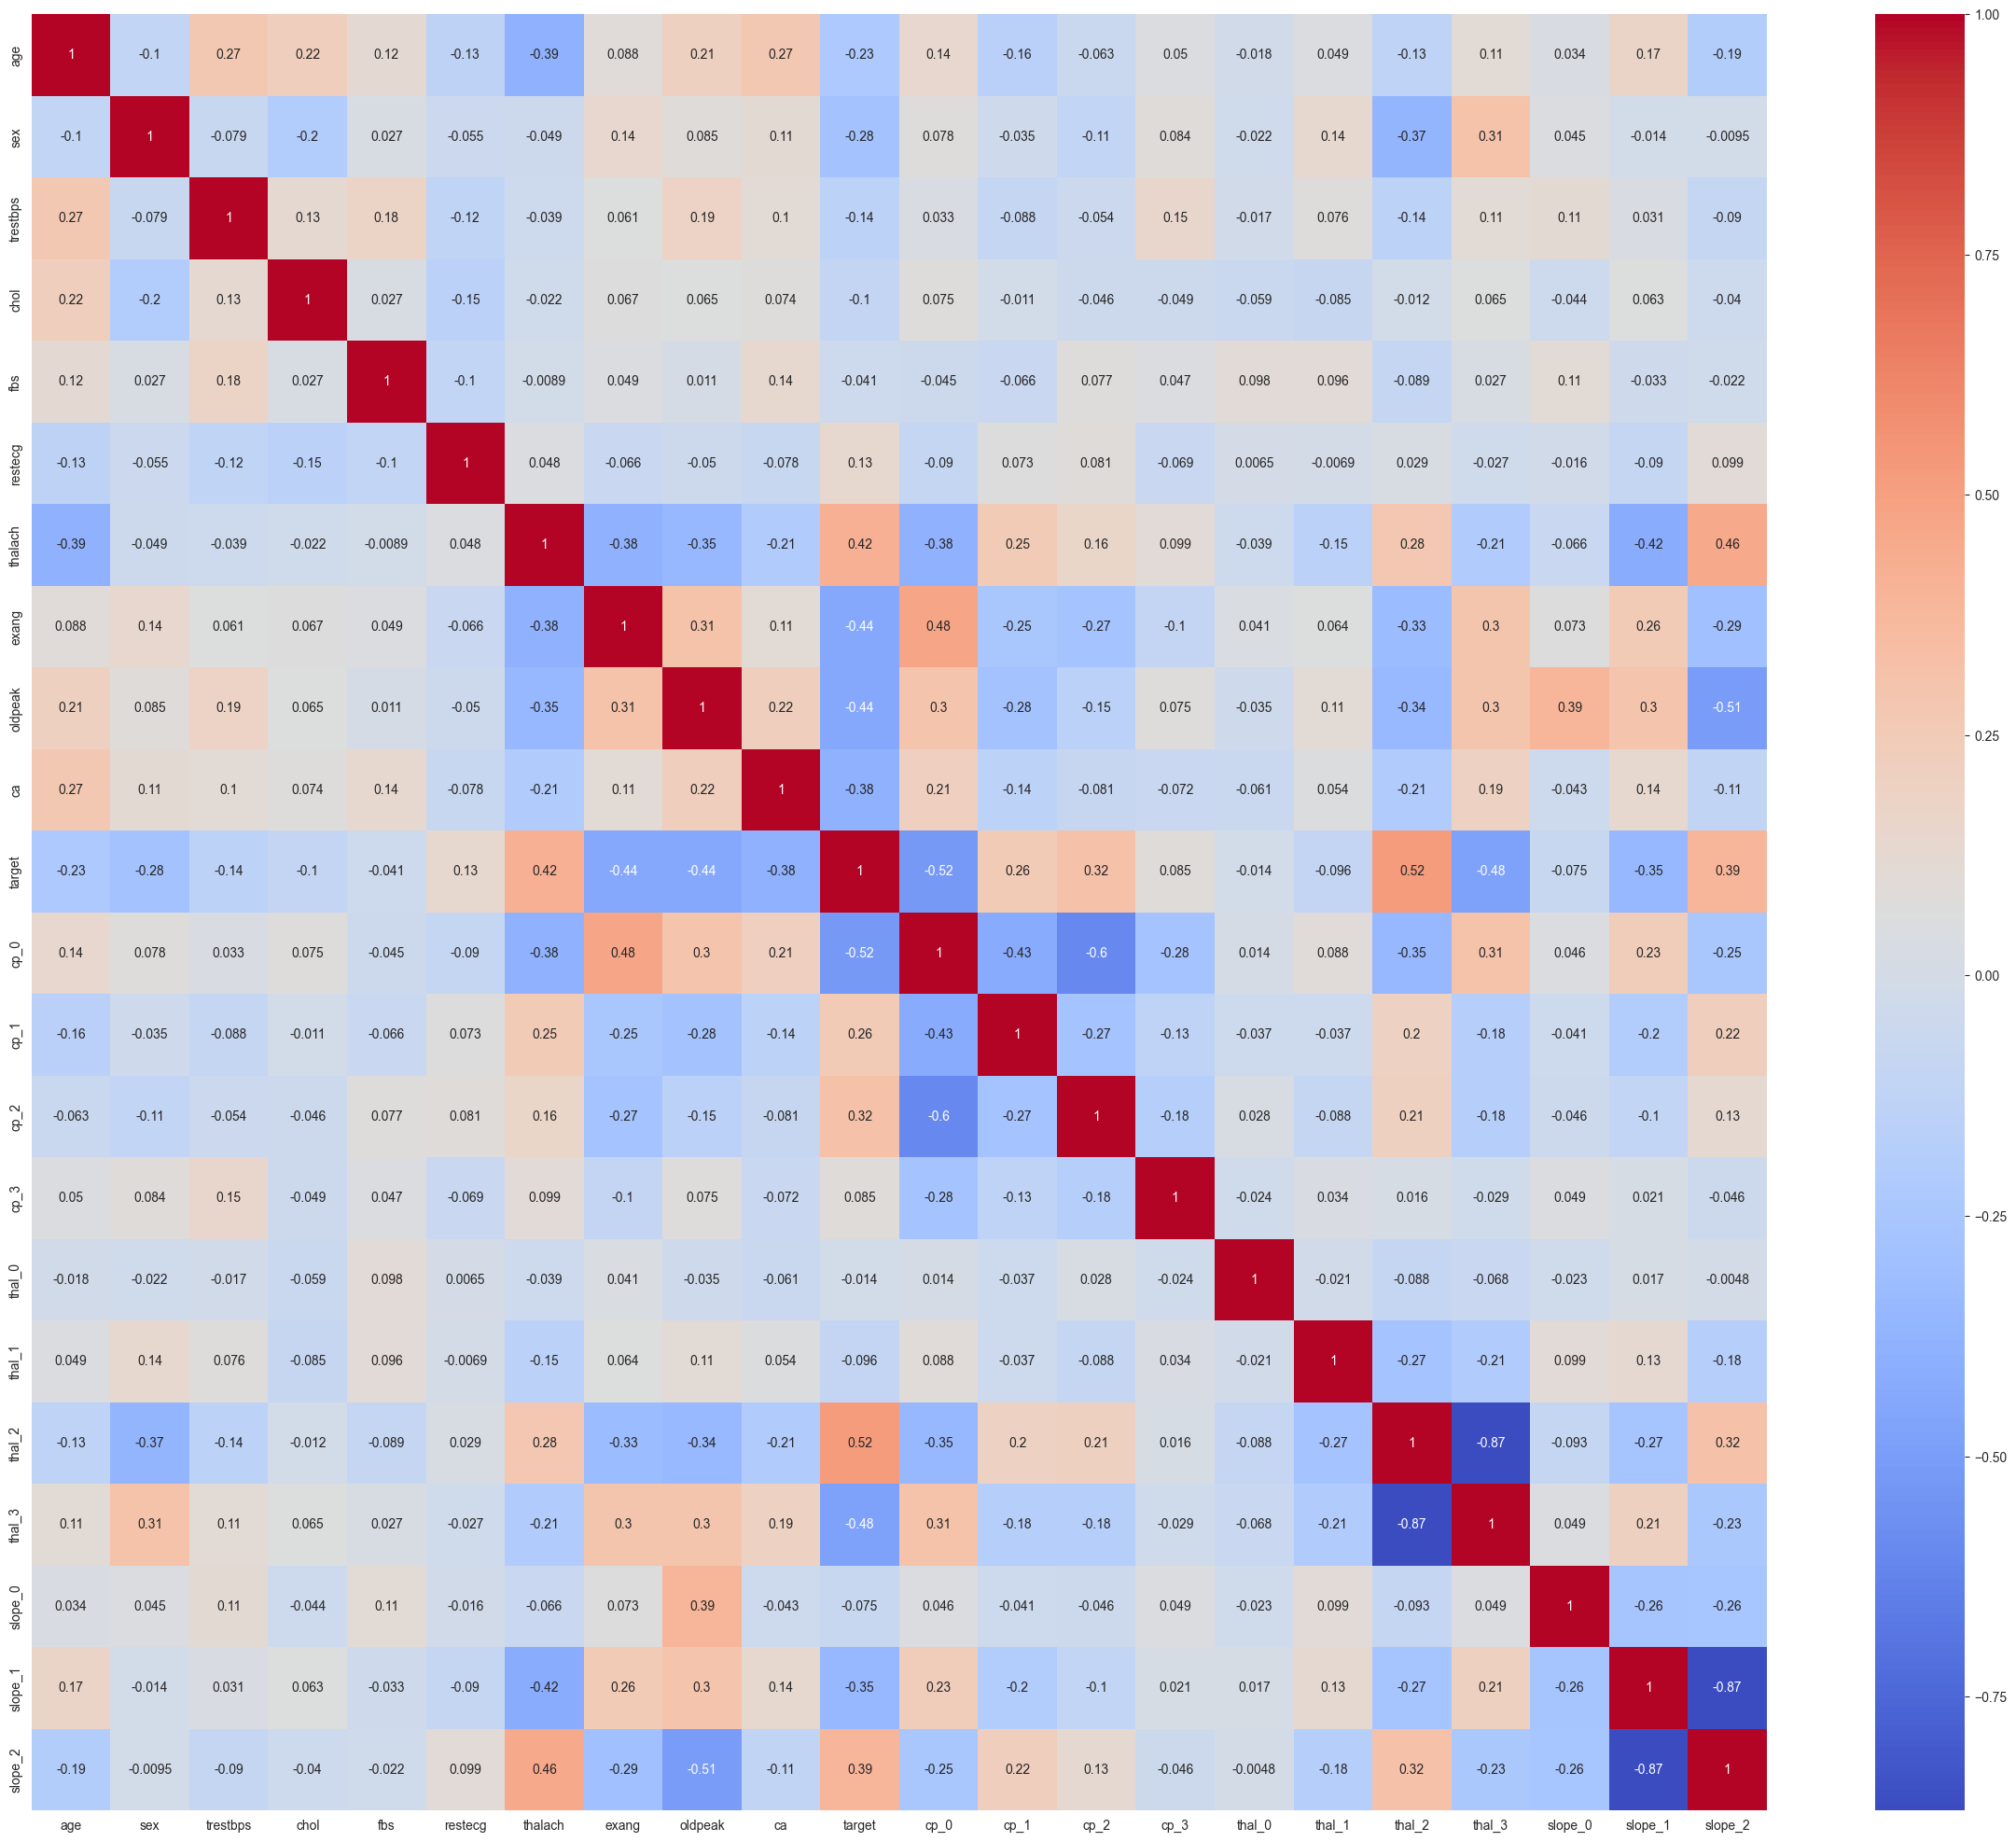

In [255]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="coolwarm")
plt.show()

С целевым признаком больше всего корелиируют признаки *thalach*, *exang*, *oldpeak*, *ca* и некоторые категории из *cp* и *thal* (как положительно, так и отрицательно).

## Разбиение данных с использованием train_test_split и масштабирование

In [256]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=123)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# масштабируем тестовую выборку, используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

## Подбор оптимальных признаков (RFE)

In [257]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import RidgeClassifierCV

rfecv = RFECV(estimator=RidgeClassifierCV())

rfecv.fit(X_train_scaled_df, y_train)

selected_features = list(X_train_scaled_df.columns[rfecv.support_])
print("Optimal features: ", rfecv.n_features_)
print("Selected features: ", selected_features)

Optimal features:  17
Selected features:  ['sex', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']


Удалим лишние признаки

In [258]:
X_train_eliminated = X_train_scaled_df[selected_features]
X_test_eliminated = X_test_scaled_df[selected_features]

# Реализация алгоритмов классификации

## K-Nearest Neighbour (KNN)

In [259]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array

class MyKnnClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k_neighbors=3):
        self.k_neighbors = k_neighbors

    def fit(self, X, y):
        X, y = check_X_y(X, y) # Проверка размерностей
        self.X_train = X
        self.y_train = y
        return self
    
    def predict(self, X):
        X = check_array(X) # Проверка ввода
        distances = np.linalg.norm(self.X_train[:, None, :] - X[None, :, :], axis=-1).T                   # матрица расстояний
        neighbor_ids = np.argsort(distances, axis=1)[:,:self.k_neighbors]                                 # индексы ближайших соседей
        neighbor_labels = np.take_along_axis(np.tile(self.y_train,(X.shape[0],1)), neighbor_ids, axis=1)  # значения ближайших соседей
        predictions = np.array([np.bincount(row).argmax() for row in neighbor_labels])
        return predictions

## Logistic Regression

In [260]:
class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha=0.001, max_steps=300):
        self.alpha = alpha
        self.max_steps = max_steps
        
    def fit(self, X, y):
        X, y = check_X_y(X, y) # Проверка размерностей
        self.X_train = self.add_dummy(X)
        self.y_train = y
        
        weights = np.zeros((np.shape(X)[1]+1,1))
        for i in range(self.max_steps):
            weights = weights - self.alpha*self.gradient(weights)
        self.weights = weights
        return self

    def predict(self, X):
        X = check_array(X) # Проверка ввода
        margins = np.dot(self.add_dummy(X), self.weights)
        predictions = np.where(self.sigmoid(margins) > 0.5, 1, 0)
        return predictions
    
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    # Градиент log-loss
    def gradient(self, w):
        return np.dot(self.X_train.T, self.sigmoid(np.dot(self.X_train,w))-np.reshape(self.y_train,(len(self.y_train),1)))
    
    def add_dummy(self, X):
        return np.c_[np.ones((np.shape(X)[0],1)),X]

## Подбор оптимальных гиперпараметров и кросс-валидация

### K-Nearest Neighbour (KNN) / Собственная реализация

In [261]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(5, shuffle=True, random_state=333)

param_grid = [{"k_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}]

searcher = GridSearchCV(MyKnnClassifier(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_k_neighbors = searcher.best_params_["k_neighbors"]
print("Optimal k_neighbors =", optimal_k_neighbors)
print("Optimal score =", searcher.best_score_)

Optimal k_neighbors = 1
Optimal score = 0.9708663916217075


### Logistic Regression / Собственная реализация

In [262]:
param_grid = {'alpha': np.logspace(-5, -3, 10)}

searcher = GridSearchCV(MyLogisticRegression(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_logreg_alpha = searcher.best_params_["alpha"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Optimal params = {'alpha': 2.782559402207126e-05}
Optimal score = 0.8483973341796254


### Logistic Regression / Библиотечная реализация

In [263]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [1E-3, 1E-1, 1, 1E+1, 1E+3]}

searcher = GridSearchCV(LogisticRegression(random_state=777), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_logreg_c = searcher.best_params_["C"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Optimal params = {'C': 0.001}
Optimal score = 0.8396276314397545


### K-Nearest Neighbour (KNN) / Библиотечная реализация

In [264]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

searcher = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_n_neighbors = searcher.best_params_["n_neighbors"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'n_neighbors': 1}
Optimal score = 0.9708663916217075


### Support Vector Machine (SVM) / Библиотечная реализация

In [265]:
from sklearn.svm import SVC

param_grid = {"kernel": ["linear", "rbf"],
              "C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "gamma": ["scale", "auto", 1E-3, 1E-1, 1, 1E+1, 1E+3]}

searcher = GridSearchCV(SVC(random_state=777), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_kernel = searcher.best_params_["kernel"]
optimal_svm_c = searcher.best_params_["C"]
optimal_gamma = searcher.best_params_["gamma"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Optimal params = {'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
Optimal score = 0.9445995980112134


### Naive Bayes Algorithm / Библиотечная реализация

In [266]:
from sklearn.naive_bayes import GaussianNB

param_grid = [{"priors": [[0.5, 0.5], [0.33, 0.67], [0.67, 0.33], [0.25, 0.75], [0.75, 0.25]],
               "var_smoothing": np.logspace(0, -10, num=100)}]

searcher = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_priors = searcher.best_params_["priors"]
optimal_var_smoothing = searcher.best_params_["var_smoothing"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'priors': [0.5, 0.5], 'var_smoothing': 0.4977023564332111}
Optimal score = 0.8571564582672166


### Decision Tree Algorithm / Библиотечная реализация

In [267]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"criterion": ["gini", "entropy", "log_loss"],
               "splitter": ["best", "random"],
               "max_depth": [10, 20, 30],
               "min_samples_split": [2, 5, 10],
               "min_samples_leaf": [2, 5, 10],
               "max_features": [2, 5, 10]}]

searcher = GridSearchCV(DecisionTreeClassifier(random_state=555), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_criterion = searcher.best_params_["criterion"]
optimal_splitter = searcher.best_params_["splitter"]
optimal_max_depth = searcher.best_params_["max_depth"]
optimal_min_samples_split = searcher.best_params_["min_samples_split"]
optimal_min_samples_leaf = searcher.best_params_["min_samples_leaf"]
optimal_max_features = searcher.best_params_["max_features"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Optimal score = 0.9314820691843858


## Тестирование обученных моделей

### K-Nearest Neighbour (KNN) / Собственная реализация

In [268]:
accuracies = {}

myKnn = MyKnnClassifier(k_neighbors=optimal_k_neighbors)
myKnn.fit(X_train_eliminated, y_train)
acc = myKnn.score(X_test_eliminated, y_test)

accuracies['KNN (my)'] = acc
print("{} NN Score: {:.4f}".format(optimal_k_neighbors, acc))

1 NN Score: 0.9823


### Logistic Regression / Собственная реализация

In [269]:
myLr = MyLogisticRegression(alpha=optimal_logreg_alpha)
myLr.fit(X_train_eliminated, y_train)
acc = myLr.score(X_test_eliminated, y_test)

accuracies['Logistic Regression (my)'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.8673


### Logistic Regression / Библиотечная реализация

In [270]:
lr = LogisticRegression(C=optimal_logreg_c, random_state=777)
lr.fit(X_train_eliminated, y_train)
acc = lr.score(X_test_eliminated, y_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.8496


### K-Nearest Neighbour (KNN) / Библиотечная реализация

In [271]:
knn = KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
knn.fit(X_train_eliminated, y_train)
acc = knn.score(X_test_eliminated, y_test)

accuracies['KNN'] = acc
print("{} NN Score: {:.4f}".format(optimal_n_neighbors, acc))

1 NN Score: 0.9823


### Support Vector Machine (SVM) / Библиотечная реализация

In [272]:
svm = SVC(kernel=optimal_kernel, C=optimal_svm_c, gamma=optimal_gamma, random_state=777)
svm.fit(X_train_eliminated, y_train)

acc = svm.score(X_test_eliminated, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.9646


### Naive Bayes Algorithm / Библиотечная реализация

In [273]:
nb = GaussianNB(priors=optimal_priors, var_smoothing=optimal_var_smoothing)
nb.fit(X_train_eliminated, y_train)

acc = nb.score(X_test_eliminated, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.8260


### Decision Tree Algorithm / Библиотечная реализация

In [274]:
dtc = DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                             max_features=optimal_max_features, min_samples_leaf=optimal_min_samples_leaf,
                             min_samples_split=optimal_min_samples_split, splitter=optimal_splitter, random_state=123)
dtc.fit(X_train_eliminated, y_train)

acc = dtc.score(X_test_eliminated, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 0.9174


## Comparing Models

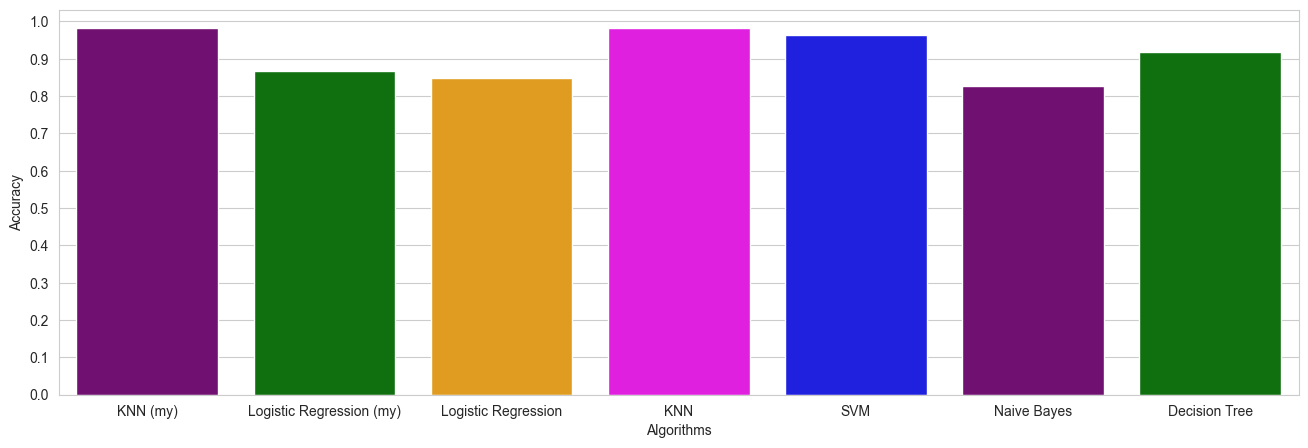

In [275]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [276]:
# Predicted values
y_head_lr = lr.predict(X_test_eliminated)
y_head_knn = knn.predict(X_test_eliminated)
y_head_svm = svm.predict(X_test_eliminated)
y_head_nb = nb.predict(X_test_eliminated)
y_head_dtc = dtc.predict(X_test_eliminated)
y_head_myKnn = myKnn.predict(X_test_eliminated)
y_head_myLr = myLr.predict(X_test_eliminated)

In [277]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_myKnn = confusion_matrix(y_test, y_head_myKnn)
cm_myLr = confusion_matrix(y_test, y_head_myLr)

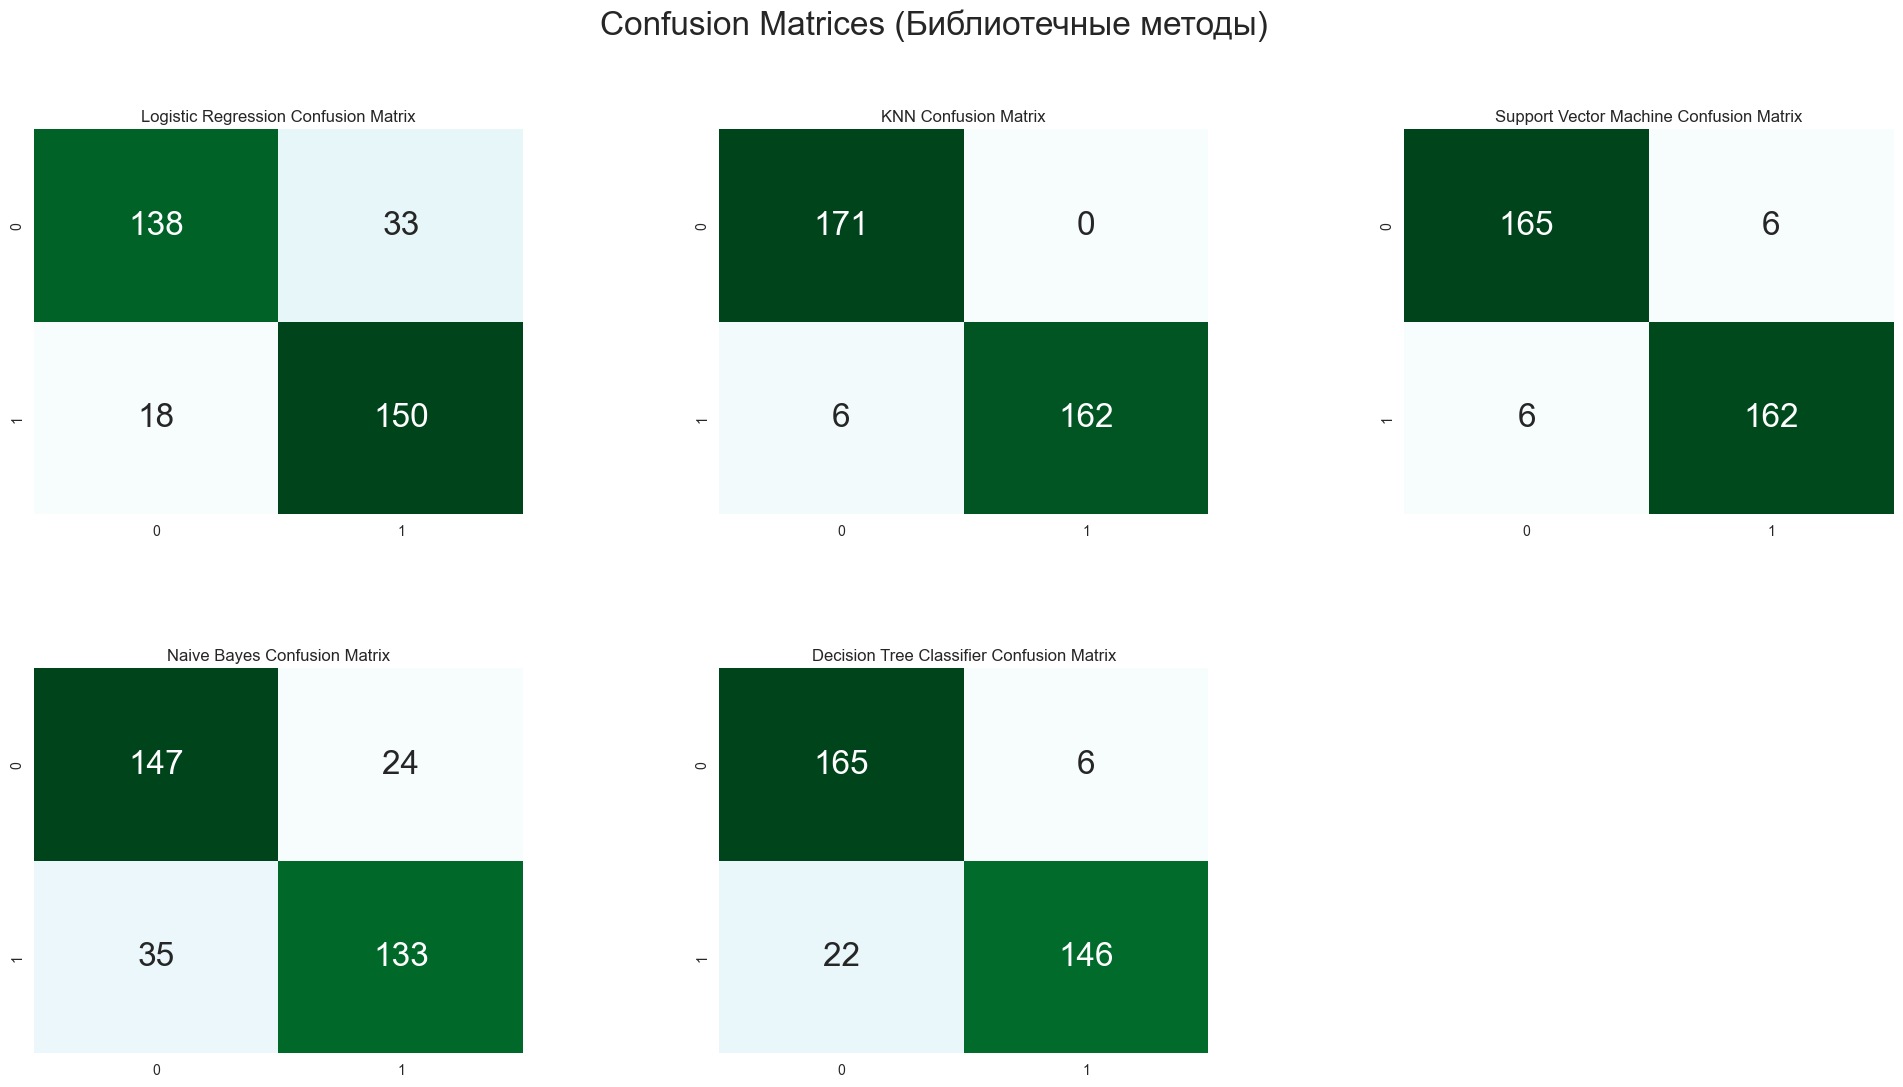

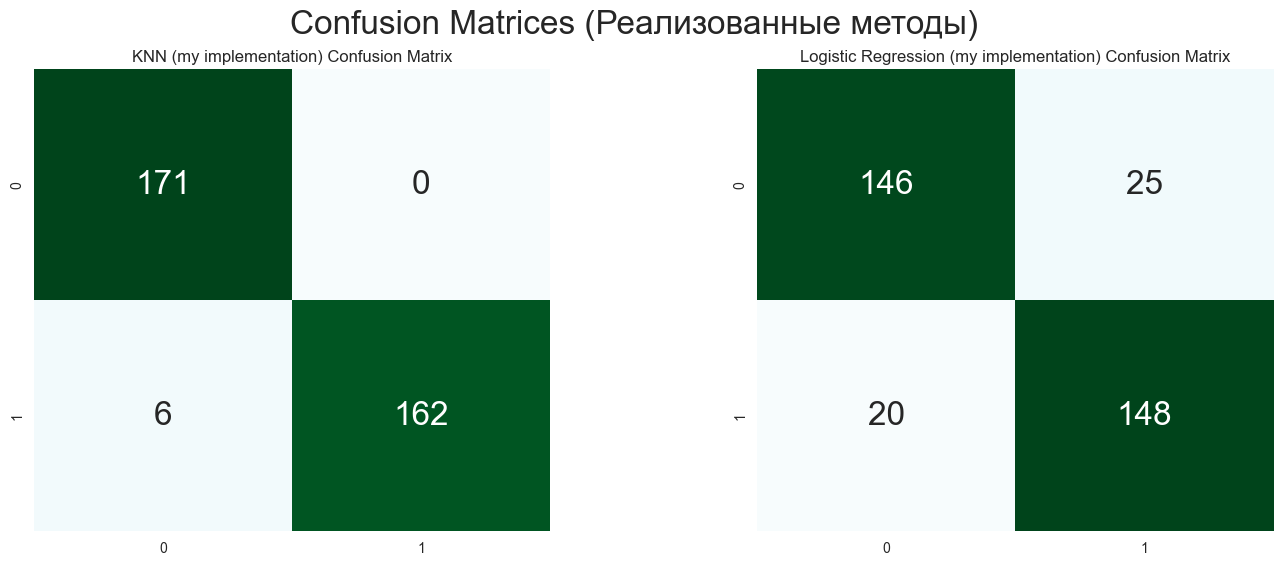

In [278]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices (Библиотечные методы)", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.figure(figsize=(16, 6))

plt.suptitle("Confusion Matrices (Реализованные методы)", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,2,1)
plt.title("KNN (my implementation) Confusion Matrix")
sns.heatmap(cm_myKnn,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,2,2)
plt.title("Logistic Regression (my implementation) Confusion Matrix")
sns.heatmap(cm_myLr,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Выводы
На данном датасете лучшие результаты показали модели, обученные с помощью KNN и SVM. Худшее значение оказалось у Naive Bayes. Собственная реализация алгоритма KNN показала точно такие же результаты, как и KNN из библиотеки sklearn. Реализованный алгоритм логистической регрессии выдал результат чуть лучше, чем библиотечный аналог. Вероятно, это связано с разным подбором гипермараметров.

------
# Второй Dataset

Набор данных из задания 2: [Car Price](https://github.com/rustam-azimov/ml-course/tree/main/data/car_price)

Признаки:

| Наименование  | Описание |
| ------------- | ---------|
| car_ID | Индекс |
| symboling | Рейтинг страхового риска |
| CarName | Название модели |
| fueltype | Тип топлива |
| aspiration | Тип наддува |
| doornumber | Количество дверей |
| carbody | Тип кузова |
| drivewheel | Привод |
| enginelocation | Расположение двигателя |
| wheelbase | Колесная база |
| carlength | Длина автомобиля |
| carwidth | Ширина автомобиля |
| carheight | Высота автомобиля |
| curbweight | Снаряженная масса |
| enginetype | Тип двигателя |
| cylindernumber | Количество цилиндров |
| enginesize | Объем двигателя |
| fuelsystem | Топливная система |
| boreratio | Диаметр цилиндра |
| stroke | Ход поршня |
| compressionratio | Степень сжатия |
| horsepower | Мощность двигателя |
| peakrpm | Максимальное число об/мин |
| citympg | Расход топлива в городе |
| highwaympg | Расход топлива на трассе |
| price | Стоимость |

Будем определять, является ли автомобиль дорогим (преобразуем признак **price** в категориальный).

Чтение данных

In [279]:
df = pd.read_csv('../data/car_price/car_price.csv')
df.shape

(205, 26)

In [280]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## EDA

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [282]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Более подробный анализ признаков проведен в [предыдущем задании](https://github.com/kolbacer/ml-course/blob/main/solutions/task02_linregr_gd.ipynb).

## Data cleaning & Feature engineering

Уберем лишний индекс

In [283]:
df.drop(['car_ID'], axis=1, inplace=True)

Моделей автомобилей очень много, нам достаточно знать марку

In [284]:
brand = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3, "brand", brand)
df.drop(['CarName'], axis=1, inplace=True)
df.head()

,symboling,fueltype,brand,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [285]:
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Некоторые модели дублируются. Объединим их.

In [286]:
df["brand"].replace({'maxda': 'mazda', 
                     'porcshce': 'porsche',
                     'toyouta': 'toyota',
                     'Nissan': 'nissan',
                     'vokswagen': 'volkswagen', 
                     'vw': 'volkswagen'}, inplace=True)

df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Проверка на дубликаты

In [287]:
df.loc[df.duplicated()]

,symboling,fueltype,brand,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


Проверка на пропущенные значения

In [288]:
df.isnull().sum()

symboling           0
fueltype            0
brand               0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Оставим наиболее значимые признаки

In [289]:
df_upd = df[['price', 'enginetype','fueltype','carbody','aspiration','cylindernumber','drivewheel',
             'curbweight','carlength','carwidth','enginesize','boreratio','horsepower','wheelbase']]
df_upd.head()

,price,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase
0,13495.0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6
1,16500.0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6
2,16500.0,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5
3,13950.0,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8
4,17450.0,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4


Преобразуем категориальные признаки

In [290]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df_upd = dummies('fueltype',df_upd)
df_upd = dummies('aspiration',df_upd)
df_upd = dummies('carbody',df_upd)
df_upd = dummies('drivewheel',df_upd)
df_upd = dummies('enginetype',df_upd)
df_upd = dummies('cylindernumber',df_upd)

In [291]:
print(df_upd.columns.tolist())
df_upd.head()

['price', 'curbweight', 'carlength', 'carwidth', 'enginesize', 'boreratio', 'horsepower', 'wheelbase', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two']


,price,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
1,16500.0,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
2,16500.0,2823,171.2,65.5,152,2.68,154,94.5,True,False,...,False,False,True,False,False,False,True,False,False,False
3,13950.0,2337,176.6,66.2,109,3.19,102,99.8,True,False,...,True,False,False,False,False,True,False,False,False,False
4,17450.0,2824,176.6,66.4,136,3.19,115,99.4,True,False,...,True,False,False,False,True,False,False,False,False,False


### Преобразуем целевой признак
Будем считать, что автомобиль дорогой, если он стоит дороже 20000$.  
Новый целевой признак, который будем предсказывать - **highend**.

In [292]:
highend = pd.cut(df_upd['price'], [0, 20000, 100000], labels=[0, 1])
df_upd.insert(1, "highend", highend)
df_upd.drop(['price'], axis=1, inplace=True)
df_upd.head()

,highend,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,0,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0,2548,168.8,64.1,130,3.47,111,88.6,True,False,...,False,False,False,False,False,True,False,False,False,False
2,0,2823,171.2,65.5,152,2.68,154,94.5,True,False,...,False,False,True,False,False,False,True,False,False,False
3,0,2337,176.6,66.2,109,3.19,102,99.8,True,False,...,True,False,False,False,False,True,False,False,False,False
4,0,2824,176.6,66.4,136,3.19,115,99.4,True,False,...,True,False,False,False,True,False,False,False,False,False


### Проанализируем соотношение классов

In [293]:
df_upd['highend'].value_counts()

highend
0    179
1     26
Name: count, dtype: int64

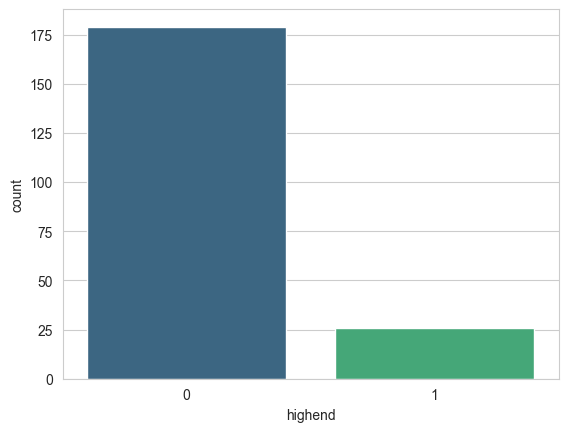

In [294]:
sns.countplot(x="highend", data=df_upd, palette='viridis')
plt.show()

Видим, что дорогих машин гораздо меньше, чем остальных. Учтем это при разбиении выборки на обучающую и тестовую.

### Проверим корелляцию

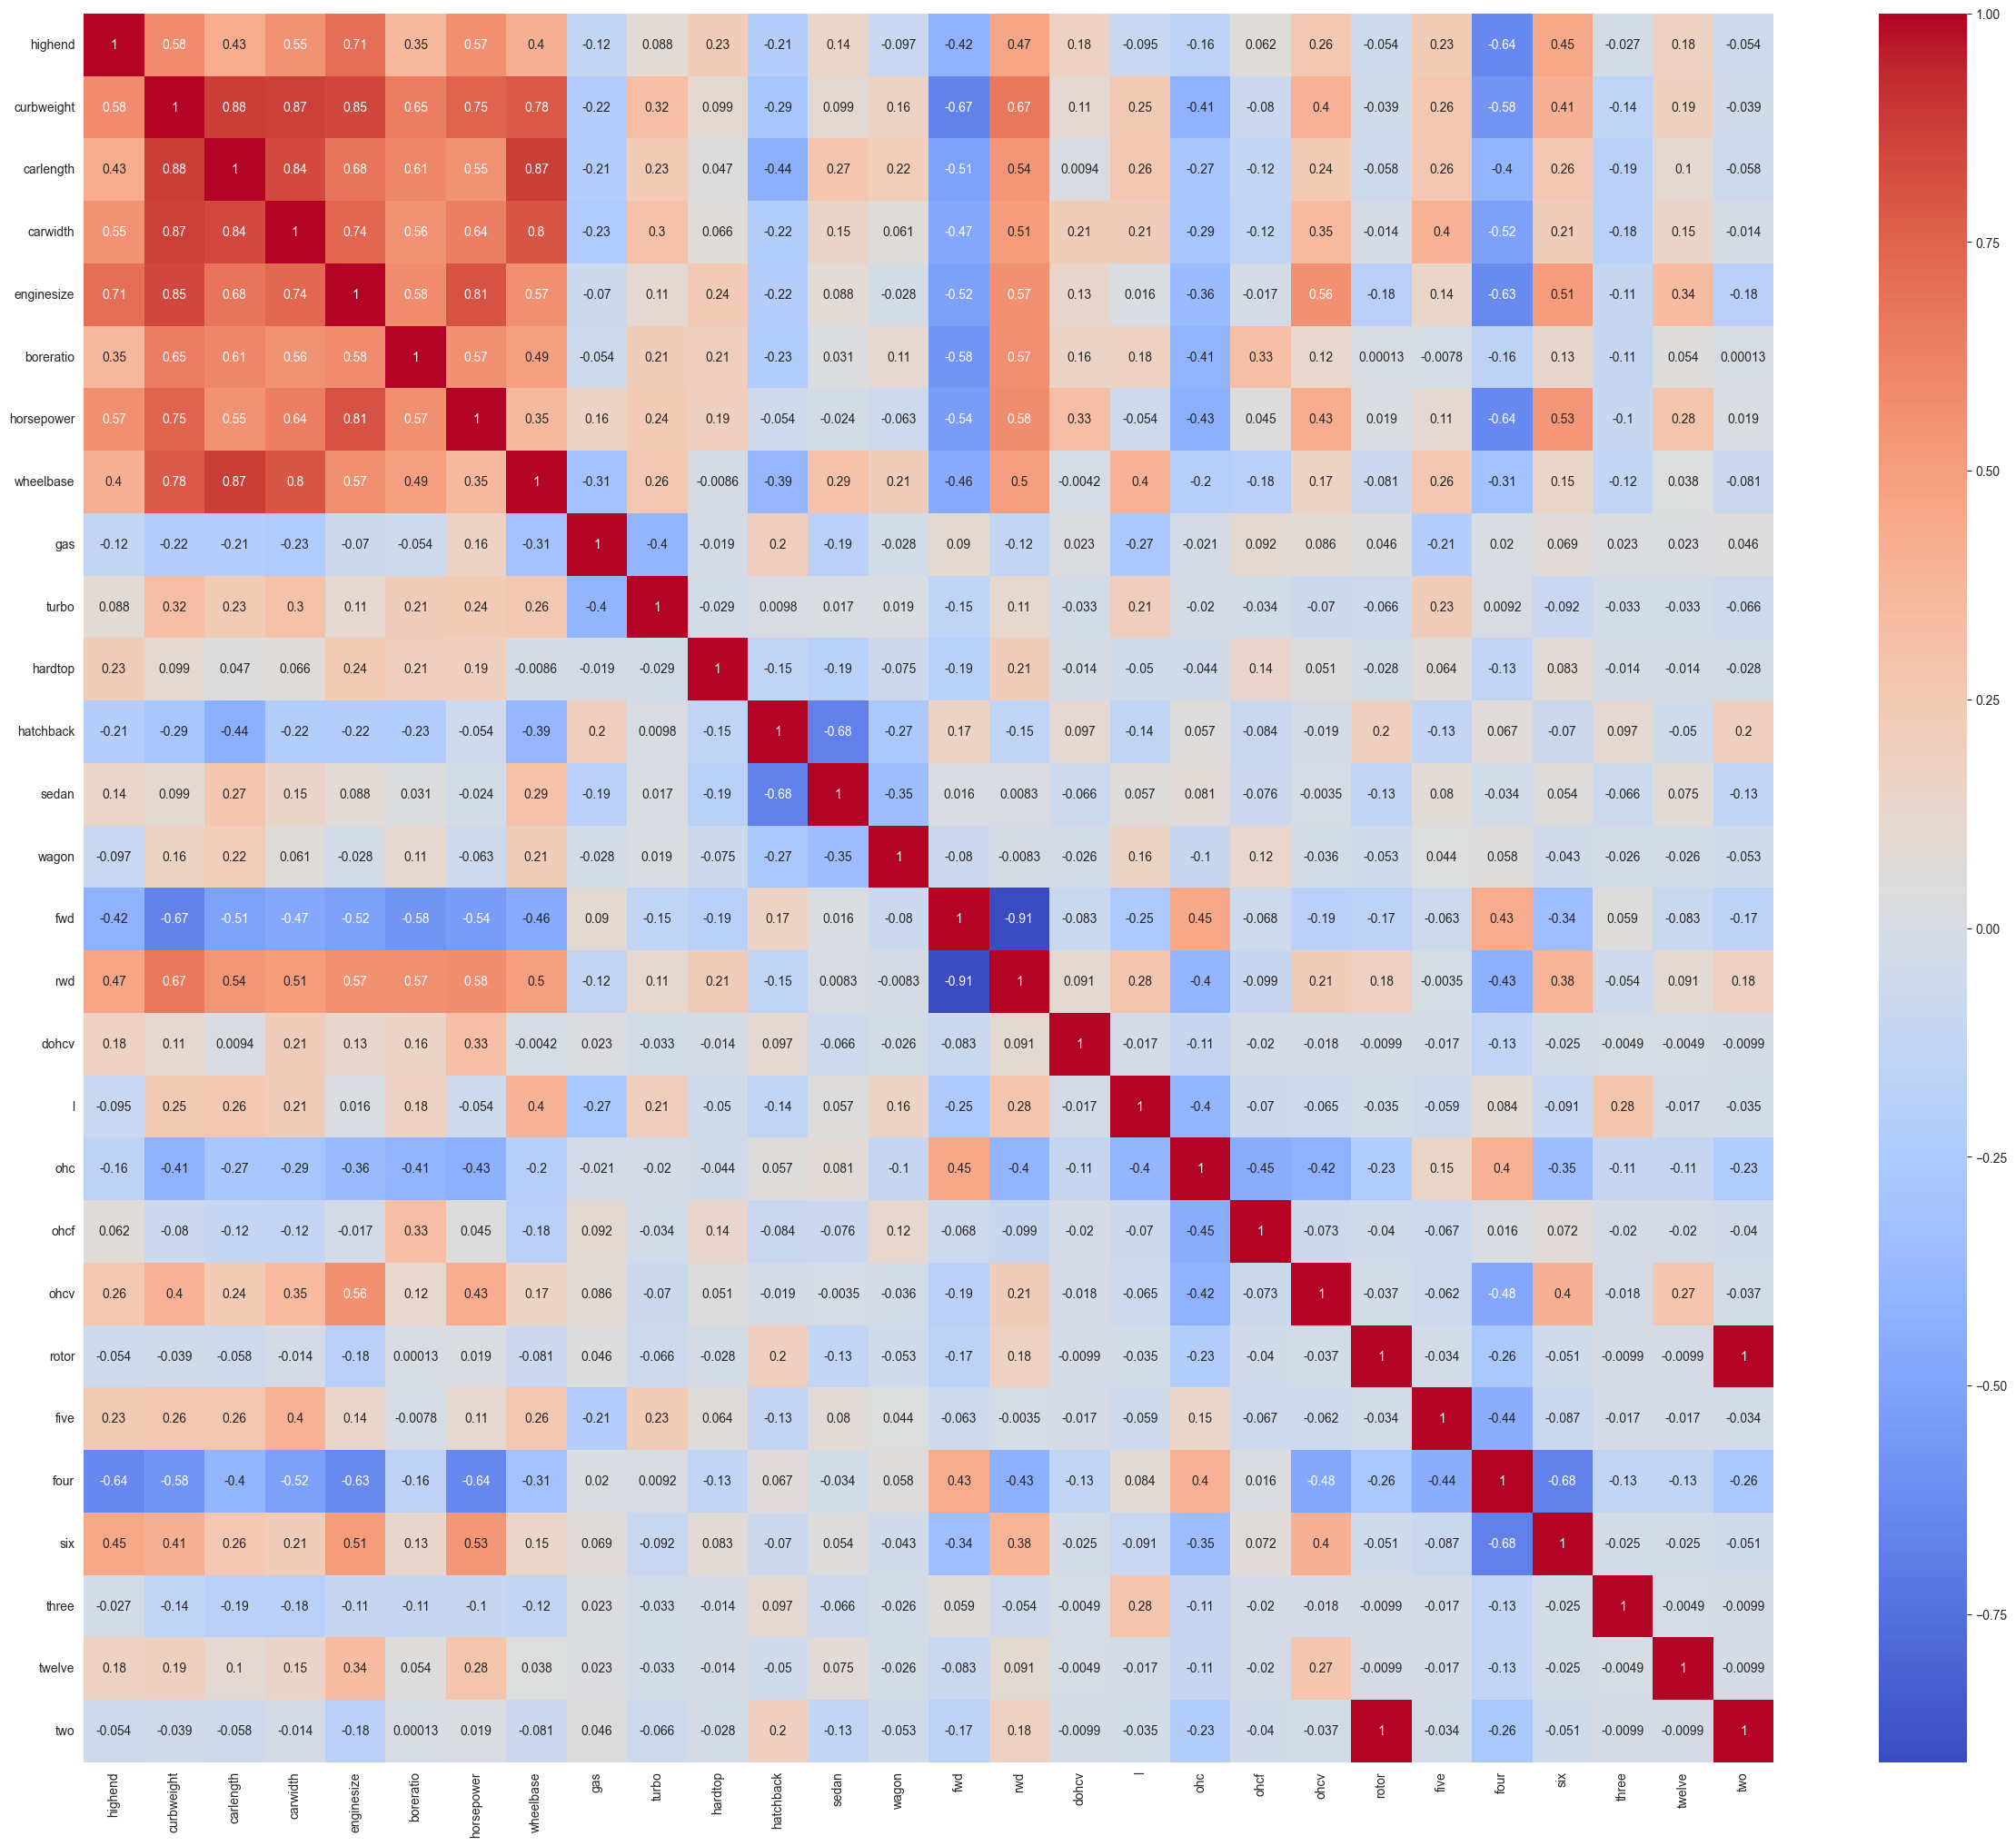

In [295]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_upd.corr(), annot = True, cmap="coolwarm")
plt.show()

Как можно видеть, с целевым признаком сильно кореллируют *curbweight*, *carlength*, *carwidth*, *enginesize*, *horsepower* и некоторые классы из *drivewheel* и *cylindernumber*.

## Разбиение данных с использованием train_test_split и масштабирование

In [296]:
y = df_upd['highend']
X = df_upd.drop(columns=['highend'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=555)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

## Подбор оптимальных признаков (RFE)

In [297]:
rfecv = RFECV(estimator=RidgeClassifierCV())

rfecv.fit(X_train_scaled_df, y_train)

selected_features = list(X_train_scaled_df.columns[rfecv.support_])
print("Optimal features: ", rfecv.n_features_)
print("Selected features: ", selected_features)

Optimal features:  7
Selected features:  ['carlength', 'carwidth', 'enginesize', 'rwd', 'ohc', 'ohcf', 'four']


Удалим лишние признаки

In [298]:
X_train_eliminated = X_train_scaled_df[selected_features]
X_test_eliminated = X_test_scaled_df[selected_features]

## Подбор оптимальных гиперпараметров и кросс-валидация

### K-Nearest Neighbour (KNN) / Собственная реализация

In [299]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(5, shuffle=True, random_state=333)

param_grid = [{"k_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}]

searcher = GridSearchCV(MyKnnClassifier(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_k_neighbors = searcher.best_params_["k_neighbors"]
print("Optimal k_neighbors =", optimal_k_neighbors)
print("Optimal score =", searcher.best_score_)

Optimal k_neighbors = 3
Optimal score = 0.9573863636363636


### Logistic Regression / Собственная реализация

In [300]:
param_grid = {'alpha': np.logspace(-5, -3, 10)}

searcher = GridSearchCV(MyLogisticRegression(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_logreg_alpha = searcher.best_params_["alpha"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Optimal params = {'alpha': 0.0005994842503189409}
Optimal score = 0.9634469696969697


### Logistic Regression / Библиотечная реализация

In [301]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [1E-3, 1E-1, 1, 1E+1, 1E+3]}

searcher = GridSearchCV(LogisticRegression(random_state=777), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_logreg_c = searcher.best_params_["C"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Optimal params = {'C': 1}
Optimal score = 0.9695075757575757


### K-Nearest Neighbour (KNN) / Библиотечная реализация

In [302]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {"n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]}

searcher = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_n_neighbors = searcher.best_params_["n_neighbors"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'n_neighbors': 3}
Optimal score = 0.9573863636363636


### Support Vector Machine (SVM) / Библиотечная реализация

In [303]:
from sklearn.svm import SVC

param_grid = {"kernel": ["linear", "rbf"],
              "C": [0.1, 0.25, 0.5, 0.75, 1, 2],
              "gamma": ["scale", "auto", 1E-3, 1E-1, 1, 1E+1, 1E+3]}

searcher = GridSearchCV(SVC(random_state=777), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_kernel = searcher.best_params_["kernel"]
optimal_svm_c = searcher.best_params_["C"]
optimal_gamma = searcher.best_params_["gamma"]
print("Optimal params =", searcher.best_params_)
print("Optimal score =", searcher.best_score_)

Optimal params = {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}
Optimal score = 0.9695075757575757


### Naive Bayes Algorithm / Библиотечная реализация

In [304]:
from sklearn.naive_bayes import GaussianNB

param_grid = [{"priors": [[0.5, 0.5], [0.33, 0.67], [0.67, 0.33], [0.25, 0.75], [0.75, 0.25]],
               "var_smoothing": np.logspace(0, -10, num=100)}]

searcher = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_priors = searcher.best_params_["priors"]
optimal_var_smoothing = searcher.best_params_["var_smoothing"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'priors': [0.67, 0.33], 'var_smoothing': 0.7924828983539173}
Optimal score = 0.9452651515151516


### Decision Tree Algorithm / Библиотечная реализация

In [305]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"criterion": ["gini", "entropy", "log_loss"],
               "splitter": ["best", "random"],
               "max_depth": [10, 20, 30],
               "min_samples_split": [2, 5, 10],
               "min_samples_leaf": [2, 5, 10],
               "max_features": [2, 5, 10]}]

searcher = GridSearchCV(DecisionTreeClassifier(random_state=555), param_grid=param_grid, cv=cv)

searcher = searcher.fit(X_train_eliminated, y_train)

optimal_criterion = searcher.best_params_["criterion"]
optimal_splitter = searcher.best_params_["splitter"]
optimal_max_depth = searcher.best_params_["max_depth"]
optimal_min_samples_split = searcher.best_params_["min_samples_split"]
optimal_min_samples_leaf = searcher.best_params_["min_samples_leaf"]
optimal_max_features = searcher.best_params_["max_features"]
print("Optimal params =", str(searcher.best_params_))
print('Optimal score =', searcher.best_score_)

Optimal params = {'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Optimal score = 0.9755681818181818


## Тестирование обученных моделей

### K-Nearest Neighbour (KNN) / Собственная реализация

In [306]:
accuracies = {}

myKnn = MyKnnClassifier(k_neighbors=optimal_k_neighbors)
myKnn.fit(X_train_eliminated, y_train)
acc = myKnn.score(X_test_eliminated, y_test)

accuracies['KNN (my)'] = acc
print("{} NN Score: {:.4f}".format(optimal_k_neighbors, acc))

3 NN Score: 0.9512


### Logistic Regression / Собственная реализация

In [307]:
myLr = MyLogisticRegression(alpha=optimal_logreg_alpha)
myLr.fit(X_train_eliminated, y_train)
acc = myLr.score(X_test_eliminated, y_test)

accuracies['Logistic Regression (my)'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.9268


### Logistic Regression / Библиотечная реализация

In [308]:
lr = LogisticRegression(C=optimal_logreg_c, random_state=777)
lr.fit(X_train_eliminated, y_train)
acc = lr.score(X_test_eliminated, y_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.9756


### K-Nearest Neighbour (KNN) / Библиотечная реализация

In [309]:
knn = KNeighborsClassifier(n_neighbors=optimal_n_neighbors)
knn.fit(X_train_eliminated, y_train)
acc = knn.score(X_test_eliminated, y_test)

accuracies['KNN'] = acc
print("{} NN Score: {:.4f}".format(optimal_n_neighbors, acc))

3 NN Score: 0.9512


### Support Vector Machine (SVM) / Библиотечная реализация

In [310]:
svm = SVC(kernel=optimal_kernel, C=optimal_svm_c, gamma=optimal_gamma, random_state=777)
svm.fit(X_train_eliminated, y_train)

acc = svm.score(X_test_eliminated, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.9756


### Naive Bayes Algorithm / Библиотечная реализация

In [311]:
nb = GaussianNB(priors=optimal_priors, var_smoothing=optimal_var_smoothing)
nb.fit(X_train_eliminated, y_train)

acc = nb.score(X_test_eliminated, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.8780


### Decision Tree Algorithm / Библиотечная реализация

In [312]:
dtc = DecisionTreeClassifier(criterion=optimal_criterion, max_depth=optimal_max_depth,
                             max_features=optimal_max_features, min_samples_leaf=optimal_min_samples_leaf,
                             min_samples_split=optimal_min_samples_split, splitter=optimal_splitter, random_state=123)
dtc.fit(X_train_eliminated, y_train)

acc = dtc.score(X_test_eliminated, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 0.9512


## Comparing Models

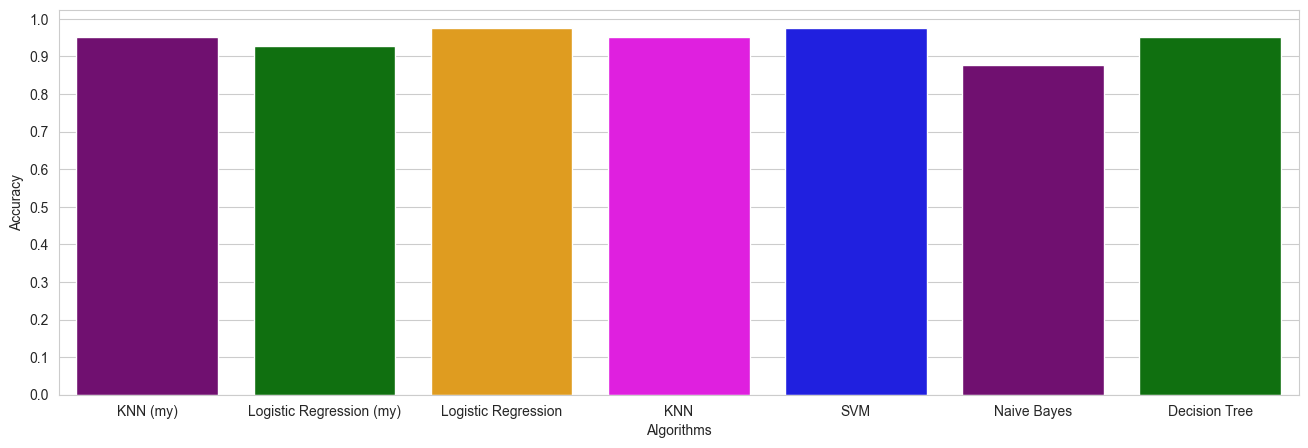

In [313]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [314]:
# Predicted values
y_head_lr = lr.predict(X_test_eliminated)
y_head_knn = knn.predict(X_test_eliminated)
y_head_svm = svm.predict(X_test_eliminated)
y_head_nb = nb.predict(X_test_eliminated)
y_head_dtc = dtc.predict(X_test_eliminated)
y_head_myKnn = myKnn.predict(X_test_eliminated)
y_head_myLr = myLr.predict(X_test_eliminated)

In [315]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_myKnn = confusion_matrix(y_test, y_head_myKnn)
cm_myLr = confusion_matrix(y_test, y_head_myLr)

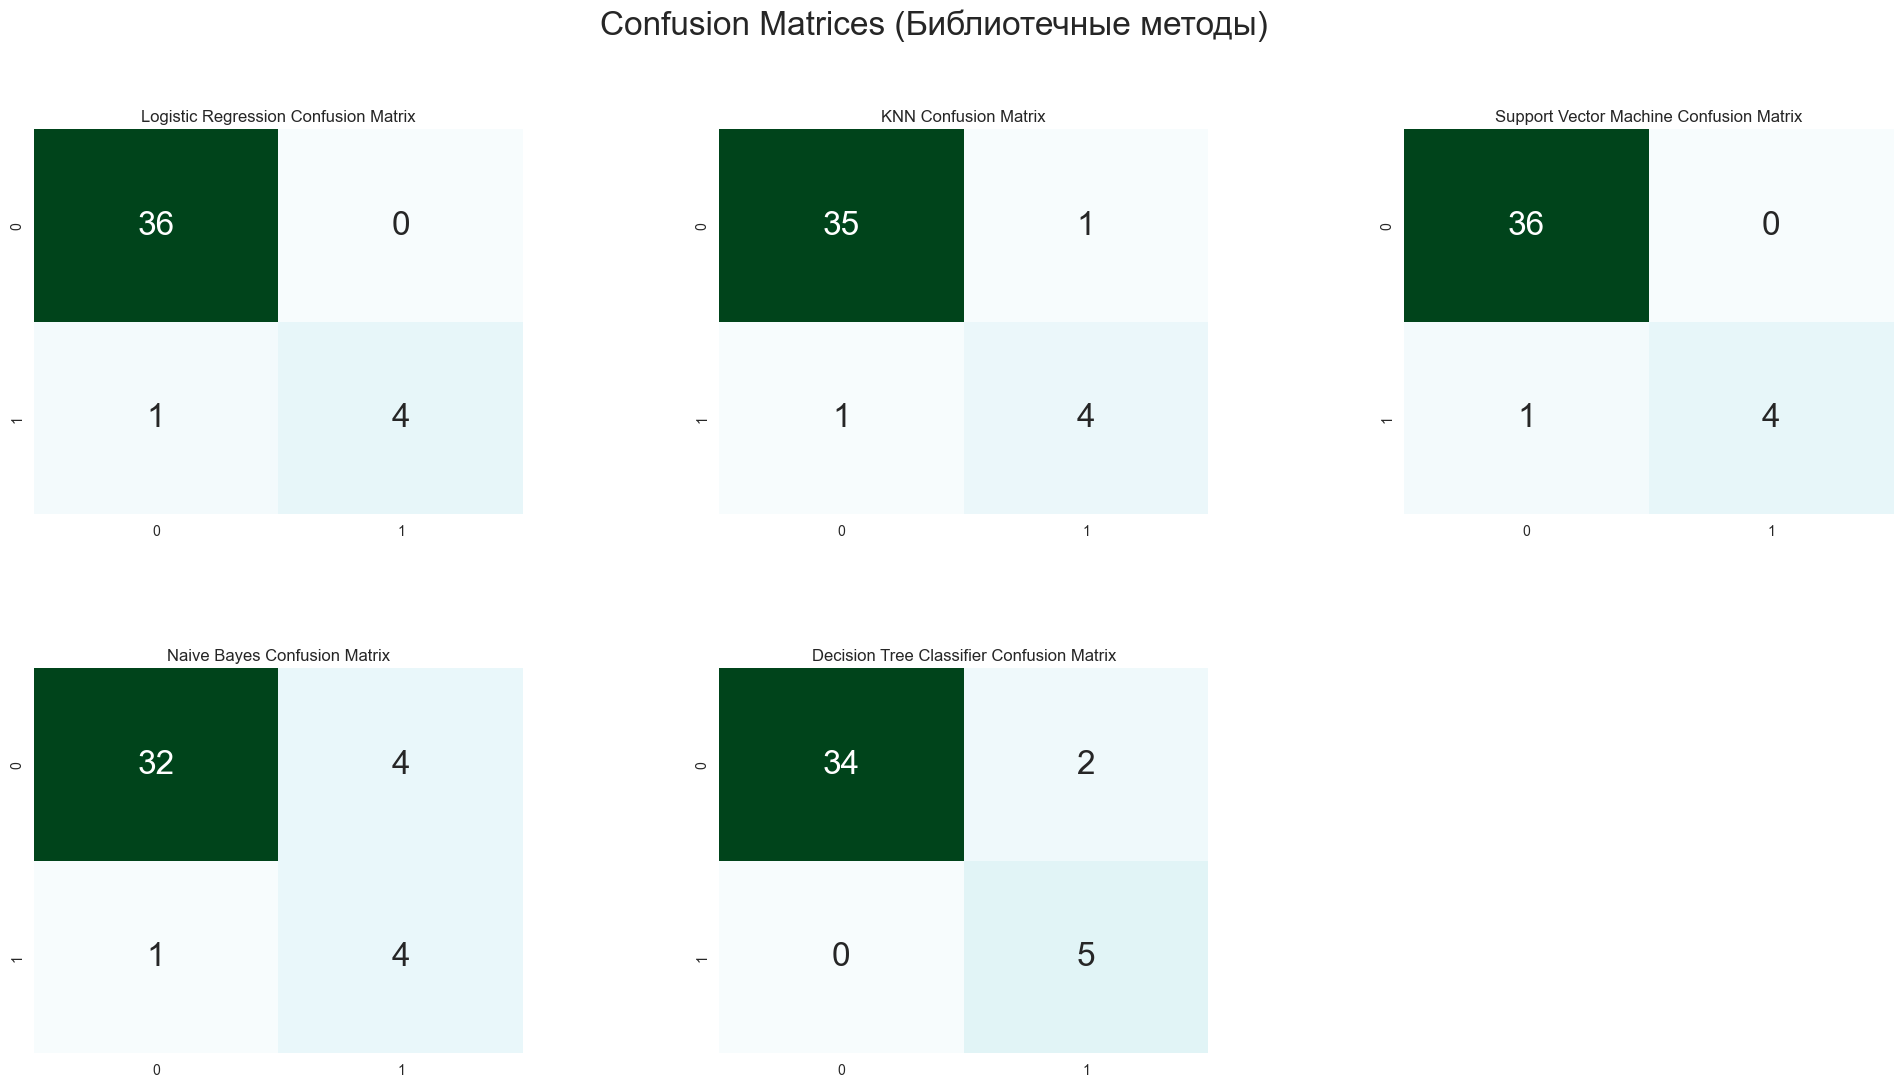

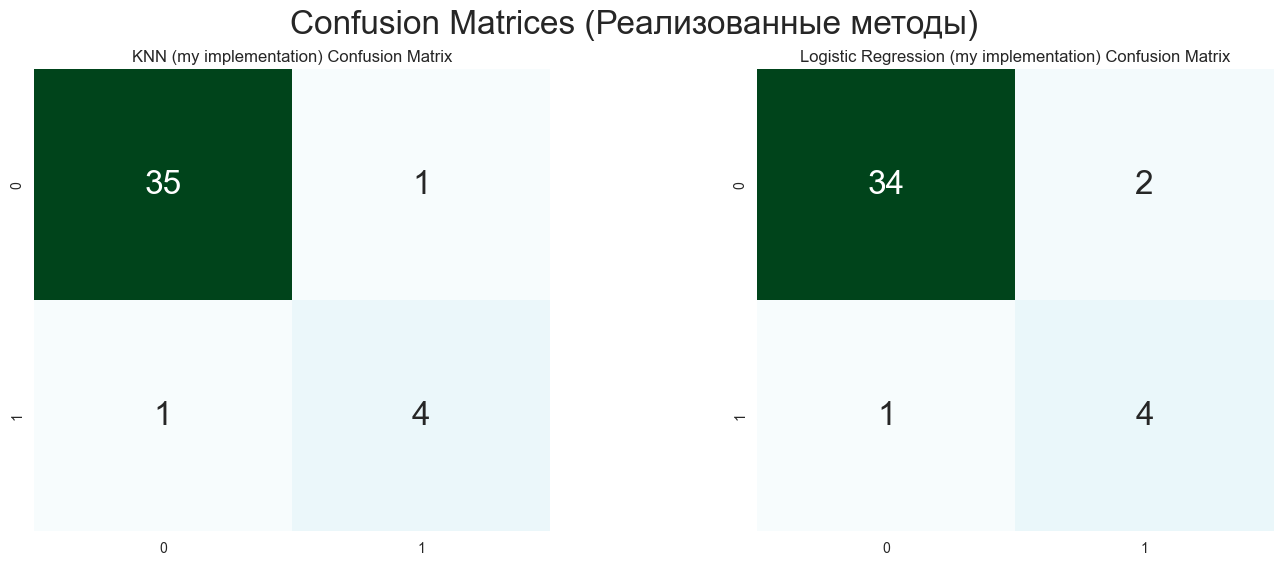

In [316]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices (Библиотечные методы)", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.figure(figsize=(16, 6))

plt.suptitle("Confusion Matrices (Реализованные методы)", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,2,1)
plt.title("KNN (my implementation) Confusion Matrix")
sns.heatmap(cm_myKnn,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(1,2,2)
plt.title("Logistic Regression (my implementation) Confusion Matrix")
sns.heatmap(cm_myLr,annot=True,cmap="BuGn",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Выводы
На данном датасете лучше всего показали себя модели, обученные с помощью SVM и библиотечной логистической регрессии. Худшим оказался, как и в прошлый раз, Naive Bayes. Результаты собственной реализации KNN здесь также не отличаются от библиотечной. Однако в этот раз реализованная логистическая регрессия оказалась хуже, чем библиотечная.